In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn import preprocessing
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
# Any results you write to the current directory are saved as output.
import re
import colorgram
from PIL import Image
import matplotlib.pyplot as plt 
import colorsys
from colorthief import ColorThief

In [68]:
# ways to sort palette
def sortByHue(elem):
    hls=colorsys.rgb_to_hls(*elem.rgb)
    return hls[0]

def sortByLight(elem):
    hls=colorsys.rgb_to_hls(*elem.rgb)
    return hls[1]

def sortBySaturation(elem):
    hls=colorsys.rgb_to_hls(*elem.rgb)
    return hls[2]

def sortByLight2(elem):
    hls = colorsys.rgb_to_hls(*elem)
    return hls[1]

In [5]:
# read data
cute_palettes=pd.read_csv('./train_cute.csv',header=None)
cute_palettes['style']='cute'
fresh_palettes=pd.read_csv('./train_fresh.csv',header=None)
fresh_palettes['style']='fresh'
tech_palettes=pd.read_csv('./train_tech.csv',header=None)
tech_palettes['style']='tech'

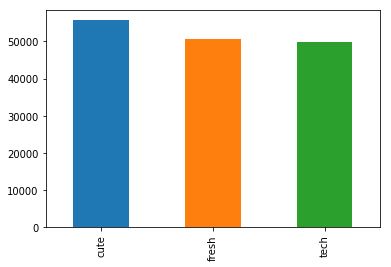

In [9]:
# concat three types of data
data=[cute_palettes,fresh_palettes,tech_palettes]
palettes=pd.concat(data)
palettes['style'].value_counts().plot("bar")

In [88]:
# divide data and label
Y=palettes['style']
X=palettes.drop('style',axis=1)

In [ ]:
# add hue saturation and lightness feature
# def toHsl(rgb):
#     n=rgb.index[1][2:3]
#     h,s,l=colorsys.rgb_to_hls(rgb[0],rgb[1],rgb[2])
#     return pd.Series({
#         'h'+n:h,
#         's'+n:s,
#         'l'+n:l
#     })
# for i in range(5):
#     X=pd.concat([X,X.iloc[:,[i*3,i*3+1,i*3+2]].apply(toHsl,axis=1)],axis=1)
# X.to_csv('./feature.csv',index=False)
#Y.to_csv('./label.csv',index=False,header=True)
#X=pd.read_csv('./feature.csv')
#Y=pd.read_csv('./label.csv')
#X.head()

In [89]:
# label encoding
le=preprocessing.LabelEncoder()
le.fit(Y)
Y=le.transform(Y)

In [90]:
le.classes_

array(['cute', 'fresh', 'tech'], dtype=object)

In [58]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.25,random_state=1)

# create dataset for lightgbm
lgb_train=lgb.Dataset(train_X,train_Y)
lgb_eval=lgb.Dataset(test_X,test_Y,reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': {'multi_error'},
    'learning_rate': 0.01,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 4,
    'num_class':3,
    'num_leaves':400,
    'max_depth':10,
    'max_bin':30
}

In [31]:
# cross validation
cv_results = lgb.cv(params, lgb_train, num_boost_round=1500, nfold=10, stratified=False, shuffle=True, metrics='multi_error',early_stopping_rounds=50,seed=0)
mem=pd.Series(cv_results['multi_error-mean'])
print('multi error mean:',mem.min())
print('best iteration:',mem.idxmin())

multi error mean: 0.08197813460881448
best iteration: 999


max_depth=14
Accuracy: 0.9108076252946602



In [53]:
## train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=320,
                valid_sets=lgb_eval,
                early_stopping_rounds=50
               )

[1]	valid_0's multi_error: 0.643948
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_error: 0.643948
[3]	valid_0's multi_error: 0.643948
[4]	valid_0's multi_error: 0.643948
[5]	valid_0's multi_error: 0.421825
[6]	valid_0's multi_error: 0.259506
[7]	valid_0's multi_error: 0.20739
[8]	valid_0's multi_error: 0.179563
[9]	valid_0's multi_error: 0.161628
[10]	valid_0's multi_error: 0.150969
[11]	valid_0's multi_error: 0.143051
[12]	valid_0's multi_error: 0.137184
[13]	valid_0's multi_error: 0.132853
[14]	valid_0's multi_error: 0.128369
[15]	valid_0's multi_error: 0.12491
[16]	valid_0's multi_error: 0.121912
[17]	valid_0's multi_error: 0.120221
[18]	valid_0's multi_error: 0.118402
[19]	valid_0's multi_error: 0.116609
[20]	valid_0's multi_error: 0.115814
[21]	valid_0's multi_error: 0.1142
[22]	valid_0's multi_error: 0.113431
[23]	valid_0's multi_error: 0.112842
[24]	valid_0's multi_error: 0.112406
[25]	valid_0's multi_error: 0.111689
[26]	valid_0's multi_error

[218]	valid_0's multi_error: 0.0950087
[219]	valid_0's multi_error: 0.0949062
[220]	valid_0's multi_error: 0.0950087
[221]	valid_0's multi_error: 0.094855
[222]	valid_0's multi_error: 0.0947781
[223]	valid_0's multi_error: 0.0946756
[224]	valid_0's multi_error: 0.0945731
[225]	valid_0's multi_error: 0.0945731
[226]	valid_0's multi_error: 0.0945731
[227]	valid_0's multi_error: 0.0945475
[228]	valid_0's multi_error: 0.094445
[229]	valid_0's multi_error: 0.0943681
[230]	valid_0's multi_error: 0.0944194
[231]	valid_0's multi_error: 0.0943938
[232]	valid_0's multi_error: 0.0943938
[233]	valid_0's multi_error: 0.0943169
[234]	valid_0's multi_error: 0.0944194
[235]	valid_0's multi_error: 0.0943938
[236]	valid_0's multi_error: 0.0943425
[237]	valid_0's multi_error: 0.0941632
[238]	valid_0's multi_error: 0.0942913
[239]	valid_0's multi_error: 0.0941632
[240]	valid_0's multi_error: 0.0940607
[241]	valid_0's multi_error: 0.0941632
[242]	valid_0's multi_error: 0.0940094
[243]	valid_0's multi_error

In [60]:
print('Starting predicting...')
# predict
y_pred = gbm.predict(test_X, num_iteration=gbm.best_iteration)
pred_Y=[0 for i in range(len(y_pred))]
y_pred=y_pred.tolist()
for i in range(len(y_pred)):
    pred_Y[i]=y_pred[i][:].index(max(y_pred[i][:]))
# eval
print('Accuracy score:', accuracy_score(test_Y, pred_Y))

Starting predicting...
Accuracy score: 0.9263605616480476


In [59]:
# train model on full data set
lgb_train=lgb.Dataset(X,Y)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=50
               )

[1]	valid_0's multi_error: 0.643948
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_error: 0.643948
[3]	valid_0's multi_error: 0.643948
[4]	valid_0's multi_error: 0.643948
[5]	valid_0's multi_error: 0.394076
[6]	valid_0's multi_error: 0.249949
[7]	valid_0's multi_error: 0.197627
[8]	valid_0's multi_error: 0.169237
[9]	valid_0's multi_error: 0.150969
[10]	valid_0's multi_error: 0.139387
[11]	valid_0's multi_error: 0.131931
[12]	valid_0's multi_error: 0.125986
[13]	valid_0's multi_error: 0.121451
[14]	valid_0's multi_error: 0.11771
[15]	valid_0's multi_error: 0.11379
[16]	valid_0's multi_error: 0.111151
[17]	valid_0's multi_error: 0.108666
[18]	valid_0's multi_error: 0.107256
[19]	valid_0's multi_error: 0.106231
[20]	valid_0's multi_error: 0.105053
[21]	valid_0's multi_error: 0.104233
[22]	valid_0's multi_error: 0.103029
[23]	valid_0's multi_error: 0.10226
[24]	valid_0's multi_error: 0.101696
[25]	valid_0's multi_error: 0.101056
[26]	valid_0's multi_erro

[213]	valid_0's multi_error: 0.0788921
[214]	valid_0's multi_error: 0.0789433
[215]	valid_0's multi_error: 0.0789433
[216]	valid_0's multi_error: 0.0787896
[217]	valid_0's multi_error: 0.0787127
[218]	valid_0's multi_error: 0.0785846
[219]	valid_0's multi_error: 0.0786102
[220]	valid_0's multi_error: 0.0785334
[221]	valid_0's multi_error: 0.0784821
[222]	valid_0's multi_error: 0.0783284
[223]	valid_0's multi_error: 0.078354
[224]	valid_0's multi_error: 0.078149
[225]	valid_0's multi_error: 0.0782259
[226]	valid_0's multi_error: 0.0780978
[227]	valid_0's multi_error: 0.0779953
[228]	valid_0's multi_error: 0.0780209
[229]	valid_0's multi_error: 0.077944
[230]	valid_0's multi_error: 0.0779953
[231]	valid_0's multi_error: 0.0779697
[232]	valid_0's multi_error: 0.0778928
[233]	valid_0's multi_error: 0.0777647
[234]	valid_0's multi_error: 0.0776878
[235]	valid_0's multi_error: 0.0777647
[236]	valid_0's multi_error: 0.0776622
[237]	valid_0's multi_error: 0.0775085
[238]	valid_0's multi_error:

In [61]:
print('Saving model...')
# save model to file
gbm.save_model('./model.txt')

Saving model...


## Using the Model

In [70]:
# load model
gbm=lgb.Booster(model_file='./model.txt')

In [63]:
# display palette
def show(palette):
    palette.sort(key=sortByLight2,reverse=True)
    im1=Image.new("RGB",(len(palette)*50,1*50))
    for i,color in enumerate(palette):
        for y in range(50):
            for x in range(50):
                im1.putpixel((x+i*50,y),color)
    plt.imshow(im1)
    plt.axis('off')
    plt.show()

In [99]:
EPS=0.55
# param: palette,eg:[(r,g,b),(r,g,b),(r,g,b),(r,g,b),(r,g,b)]
# return style ['cute','fresh','technology']
# return -1: do not belong to cute, fresh or technology
def style_predict(palette):
    def sortByLight2(elem):
        hls=colorsys.rgb_to_hls(*elem)
        return hls[1]
    # build a color palette
    palette.sort(key=sortByLight2,reverse=True)
    palette1=[*palette[0],*palette[1],*palette[2],*palette[3],*palette[4]]
    x=pd.Series(palette1,dtype='float64')
    y_pred = gbm.predict(x, num_iteration=gbm.best_iteration)
    print("Probability：",y_pred)
    y_pred=y_pred.tolist()[0]
    style=['cute','fresh','technology']
    if(max(y_pred)<EPS):
        return -1
    pred_Y=y_pred.index(max(y_pred))
    return style[pred_Y]

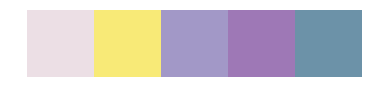

Probability： [[0.89097096 0.04918248 0.05984655]]
cute


E:\Users\ASUS\Anaconda3\lib\site-packages\lightgbm\basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [116]:
# test, show the palette extract from image, and the style prediction for the palette
color_thief = ColorThief('./data/cute/cute_42.jpg')
# build a color palette
palette = color_thief.get_palette(color_count=5,quality=1)
palette.sort(key=sortByLight2,reverse=True)
im1=Image.new("RGB",(len(palette)*50,1*50))
for i,color in enumerate(palette):
    for y in range(50):
        for x in range(50):
            im1.putpixel((x+i*50,y),color)
plt.imshow(im1)
plt.axis('off')
plt.show()
print(style_predict(palette))
